In [18]:
import pandas as pd
import os
import ast
import matplotlib.pyplot as plt
from pathlib import Path

In [19]:
# function that extracts the sentiment data from the dataset

def extract_sentiments_with_date(df, column_data):
    sentiment_data = []
    for idx, entry in column_data.dropna().items():  # go through all the rows in the column
        try:
            # change the string to a dictionary
            data = ast.literal_eval(entry)
            if isinstance(data, dict) and 'noticias' in data:
                # extract the sentiment data from the dictionary
                for noticia in data['noticias']:
                    if 'sentimiento' in noticia:
                        sentiment_data.append({"date": df.loc[idx, "Date"],  # extract the date
                                               "sentimiento": noticia["sentimiento"]})
        except (ValueError, SyntaxError):
            continue
    return sentiment_data

In [27]:
# get all the files

files = os.listdir("../../data/processed/")
files = [f for f in files if f.startswith("dataset_completo_con_sentimientos_parte") and f.endswith(".csv")]

for idx, file in enumerate(files): 
    # read the file
    path = Path('../../data/processed') / file
    df2 = pd.read_csv(path, encoding="utf-8")

    # convert the 'Date' column to datetime
    df2['Date'] = pd.to_datetime(df2['Date'])
    df2['Year'] = df2['Date'].dt.year
    # check the unique values in the 'Year' column
    print(f"{idx}: {df2['Year'].unique()}")

    # list to store the sentiment data
    file_sentiments_with_dates = []

    # extract the sentiment data from the dataset
    for column in df2.columns:
        if column not in ['Date', 'Period']:  
            sentiments = extract_sentiments_with_date(df2, df2[column])
            file_sentiments_with_dates.extend(sentiments)        

    # convert the list to a DataFrame
    df_noticias_con_sentimiento = pd.DataFrame(file_sentiments_with_dates)

    # save as a global variable
    globals()[f'df_noticias_con_sentimiento_{idx}'] = df_noticias_con_sentimiento
    print(f"File {file} processed")


0: [2012 2020]
File dataset_completo_con_sentimientos_parte_0.csv processed
1: [2020 2012 2013]
File dataset_completo_con_sentimientos_parte_1.csv processed
2: [2013 2014]
File dataset_completo_con_sentimientos_parte_2.csv processed
3: [2014 2015]
File dataset_completo_con_sentimientos_parte_3.csv processed
4: [2015 2016]
File dataset_completo_con_sentimientos_parte_4.csv processed
5: [2016 2017]
File dataset_completo_con_sentimientos_parte_5.csv processed
6: [2017 2018]
File dataset_completo_con_sentimientos_parte_6.csv processed
7: [2018 2019]
File dataset_completo_con_sentimientos_parte_7.csv processed
8: [2019 2020]
File dataset_completo_con_sentimientos_parte_8.csv processed


In [29]:
# merge all the 0-8 dataframes together
df_sentimiento = pd.concat([df_noticias_con_sentimiento_0, df_noticias_con_sentimiento_1, df_noticias_con_sentimiento_2, df_noticias_con_sentimiento_3, df_noticias_con_sentimiento_4, df_noticias_con_sentimiento_5, df_noticias_con_sentimiento_6, df_noticias_con_sentimiento_7, df_noticias_con_sentimiento_8]) 
df_sentimiento

,date,sentimiento
0,2012-08-09 00:00:00+00:00,neutral
1,2012-01-09 00:00:00+00:00,neutral
2,2012-05-01 00:00:00+00:00,neutral
3,2012-05-01 00:00:00+00:00,positive
4,2012-05-21 00:00:00+00:00,negative
...,...,...
519738,2020-01-29 00:00:00+00:00,positive
519739,2020-01-29 00:00:00+00:00,neutral
519740,2020-01-29 00:00:00+00:00,neutral
519741,2020-01-31 00:00:00+00:00,positive


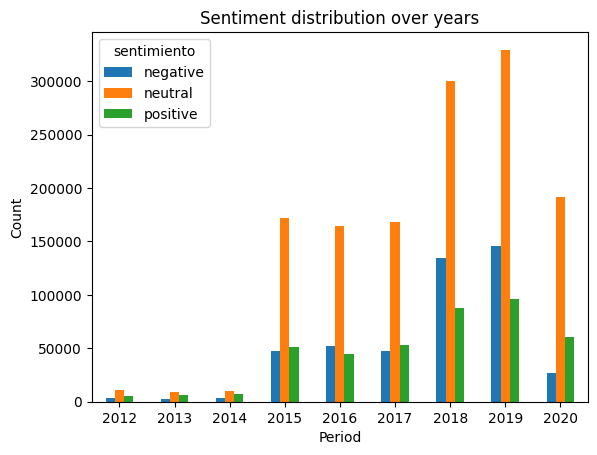

In [30]:
# SENTIMENT DISTRIBUTION OVER THE YEARS

df_sentimiento = pd.read_csv('../../data/processed/df_sentimiento.csv')

df_sentimiento['date'] = pd.to_datetime(df_sentimiento['date'])
df_sentimiento['year'] = df_sentimiento['date'].dt.year
df_sentimiento = df_sentimiento.groupby(['year', 'sentimiento']).size().unstack().fillna(0)

# don't include the "none" sentiment
df_sentimiento = df_sentimiento.drop(columns='none', errors='ignore')
df_sentimiento.plot(kind='bar', stacked=False)
plt.xticks(rotation=0)
plt.xlabel('Period')
plt.ylabel('Count')
plt.title('Sentiment distribution over years')
plt.show()


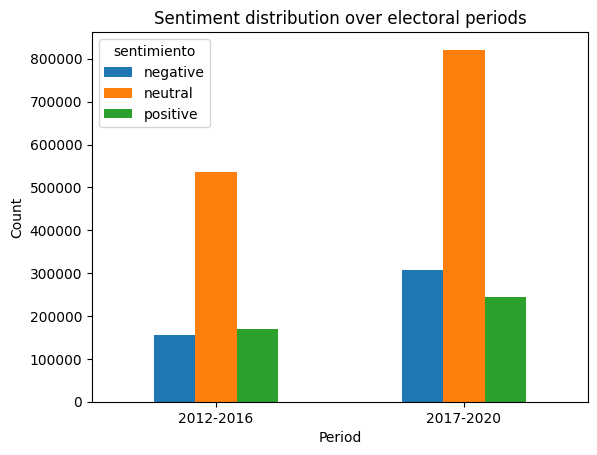

In [31]:
# SENTIMENT DISTRIBUTION OVER ELECTORAL PERIODS

df_sentimiento = pd.read_csv('../../data/processed/df_sentimiento.csv')

df_sentimiento['date'] = pd.to_datetime(df_sentimiento['date'])
df_sentimiento['year'] = df_sentimiento['date'].dt.year

df_sentimiento['period'] = df_sentimiento['year'].apply(lambda x: '2017-2020' if x > 2017 else '2012-2016')
df_sentimiento = df_sentimiento.groupby(['period', 'sentimiento']).size().unstack().fillna(0)

df_sentimiento = df_sentimiento.drop(columns='none', errors='ignore')
df_sentimiento.plot(kind='bar', stacked=False)
plt.xticks(rotation=0)
plt.xlabel('Period')
plt.ylabel('Count')
plt.title('Sentiment distribution over electoral periods')
plt.show()